In [1]:
import sys 
sys.path.append('..')

import matplotlib.pyplot as plt
import seaborn as sns
import torch
from models import SoftmaxWeight, LocationScaleFlow
from models import DIFDensityEstimator
from models_em import EMDensityEstimator
%load_ext autoreload
%autoreload 2

number of samples = 5958


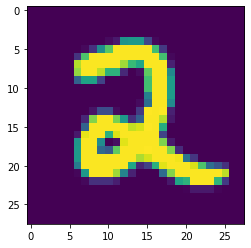

In [2]:
###MNIST###

import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)
images = mnist_trainset.data.flatten(start_dim=1)
targets = mnist_trainset.targets

digit = 2
if digit != 'all':
    extracted = images[targets == digit].float()
else: 
    extracted = images.float()
target_samples = extracted

num_samples  = target_samples.shape[0]
print('number of samples = ' + str(num_samples))
p = target_samples.shape[-1]
plt.imshow(target_samples[torch.randint(low = 0, high = num_samples, size = [1])].reshape(28,28))

train_set, test_set = target_samples[:4000], target_samples[4000:]

100%|█████████████████████████████████| 200/200 [10:09<00:00,  3.05s/it, loss = 295175.125]


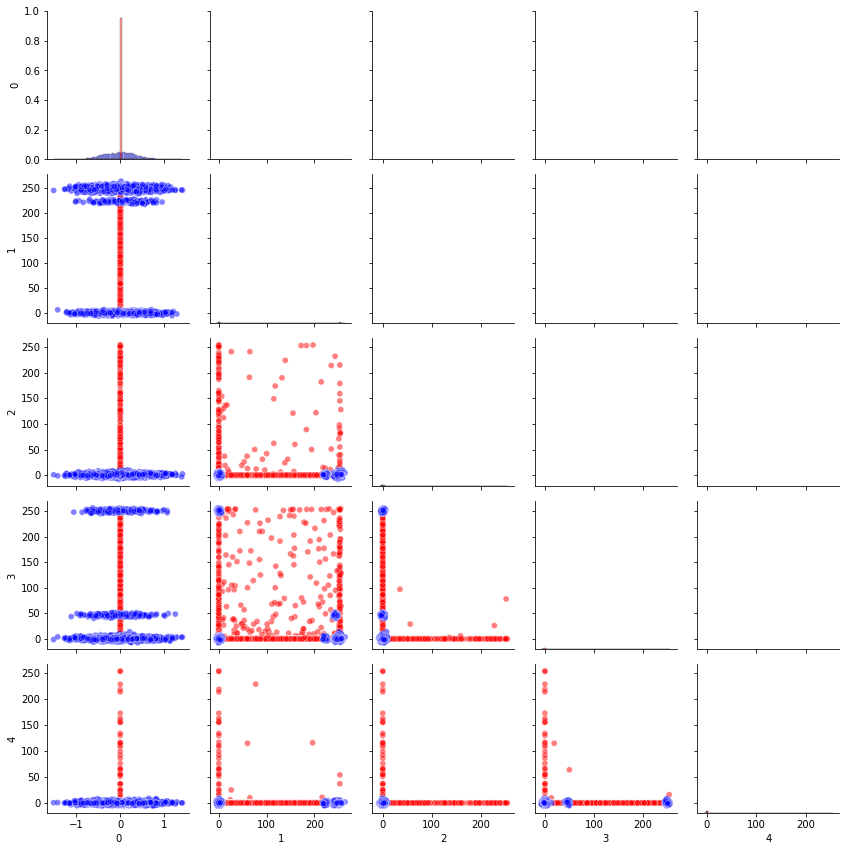

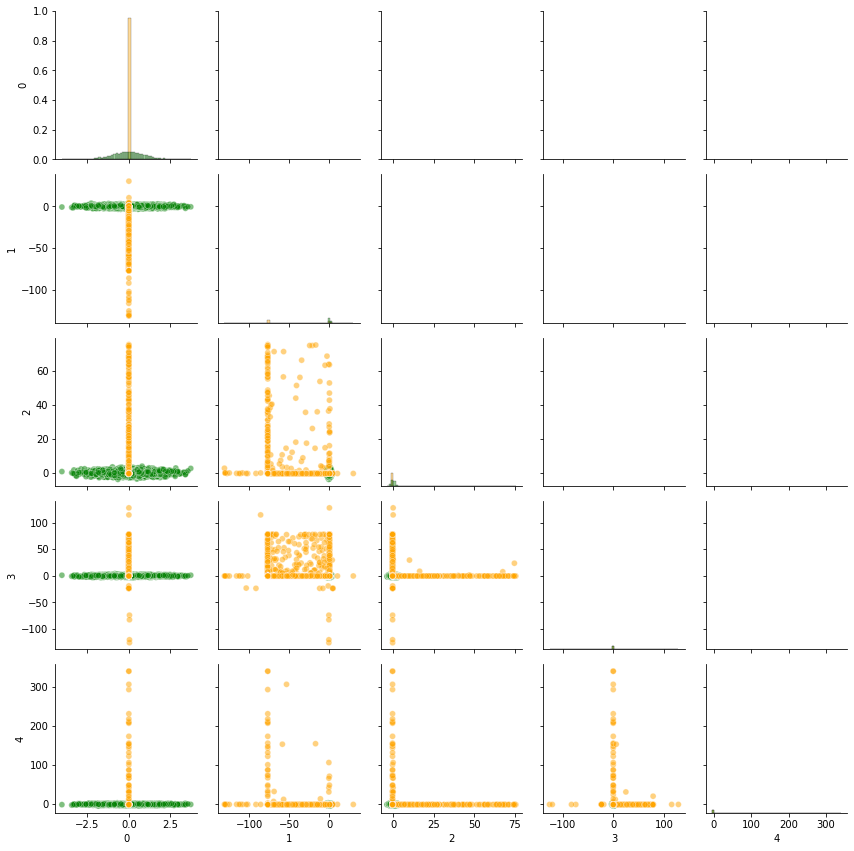

In [7]:
dif = DIFDensityEstimator(target_samples, K)
dif.w = SoftmaxWeight(K,p, [])
dif.train(200)
dif.model_visual()

In [30]:
dif.train(2000)
dif.model_visual()

 23%|██████▋                      | 460/2000 [26:26<1:28:32,  3.45s/it, loss = 1109.367798]


KeyboardInterrupt: 

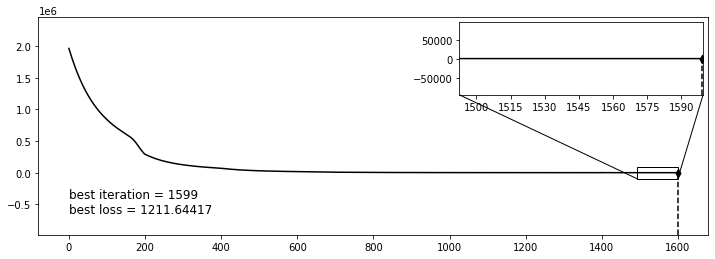

In [29]:
dif.train_visual()

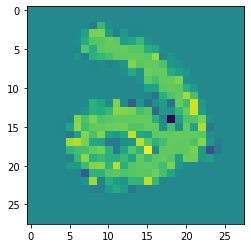

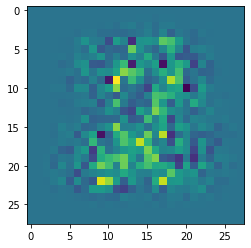

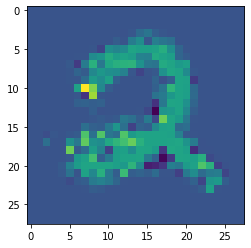

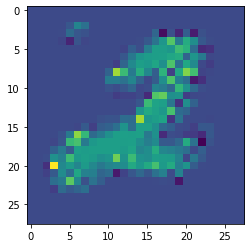

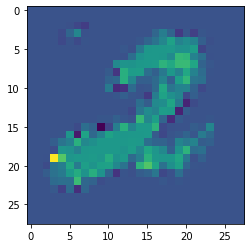

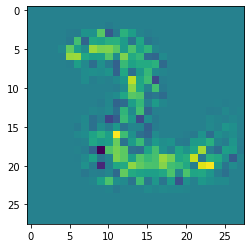

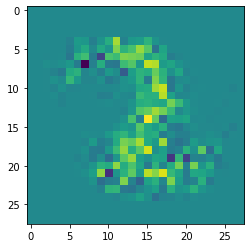

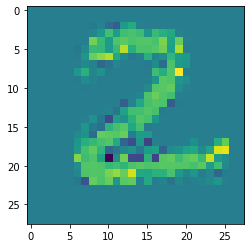

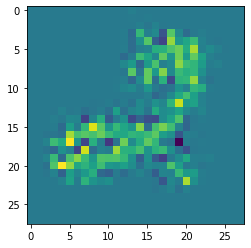

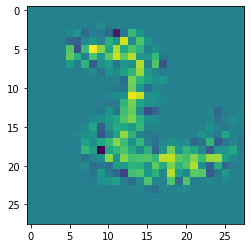

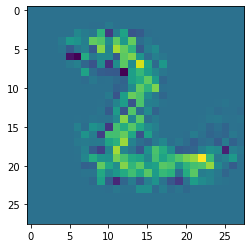

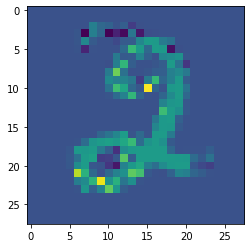

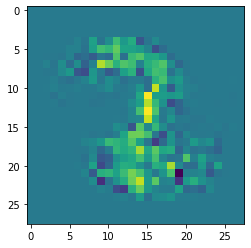

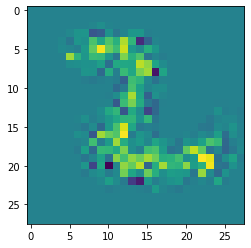

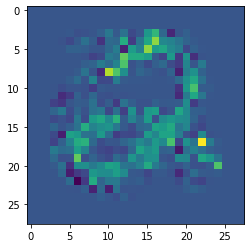

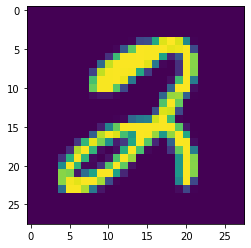

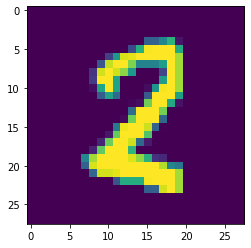

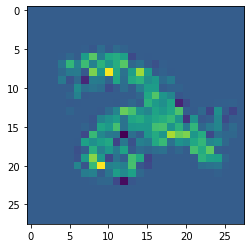

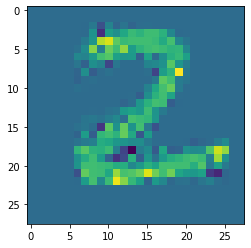

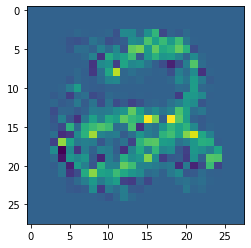

In [33]:
for _ in range(20):
    plt.figure()
    sample = dif.sample_model(1)
    plt.imshow(sample[0].reshape(28,28))